<a href="https://colab.research.google.com/github/Pallavih28/Black_Friday_Sales_Prediction/blob/main/Black_Friday_Sales_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Black Friday Sales Prediction Model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
train_df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [ ]:
train_df.shape,test_df.shape

((550068, 12), (233599, 11))

* There are 5891 customers in the dataset.
* There are 3631 products in the dataset.
* Occupation has 20 unique values.
* There are 3 city categories.
* Product_Category_1 has 20 unique categories.



In [ ]:
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
test_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [ ]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Variable Typecasting

In [ ]:
train_df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [ ]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
train_df[['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years']] = train_df[['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years']].astype('category')

In [ ]:
test_df[['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years']] = test_df[['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years']].astype('category')

In [ ]:
train_df.dtypes

User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object

In [ ]:
test_df.dtypes

User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
dtype: object

### Exploratory Data Analysis

* Univariate Data Analysis

In [ ]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### 2.Gender

In [ ]:
train_df['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

<Axes: xlabel='count', ylabel='Gender'>

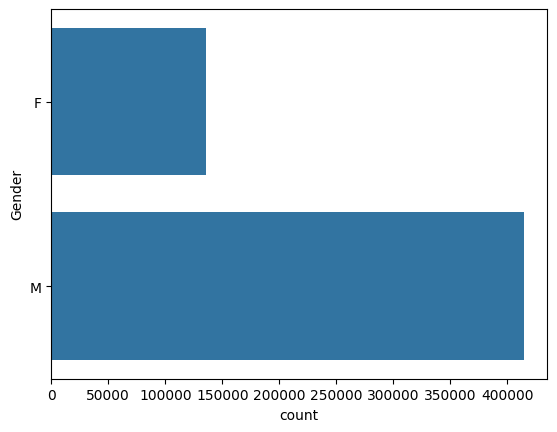

In [ ]:
sns.countplot(train_df['Gender'])

### 3. Age

In [ ]:
train_df['Age'].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

<Axes: xlabel='count', ylabel='Age'>

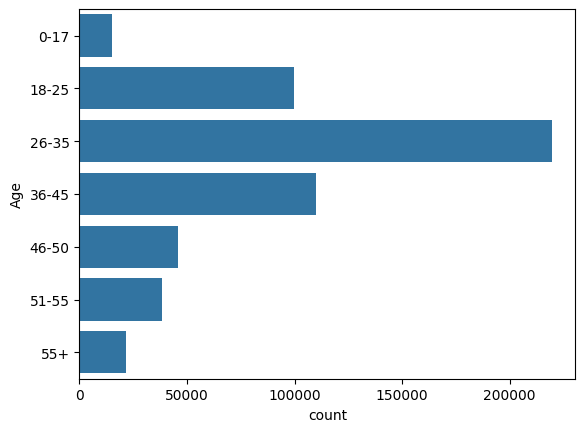

In [ ]:
sns.countplot(train_df['Age'])

In [ ]:
train_df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### 4. Occupation

In [ ]:
train_df['Occupation'].value_counts(normalize=True)*100

4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

<Axes: >

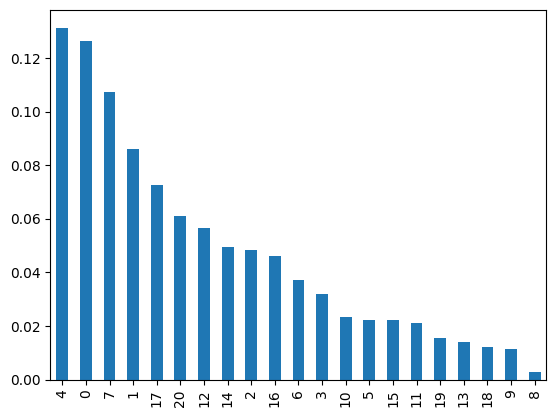

In [ ]:
train_df['Occupation'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
col = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

In [ ]:
def count_plots(data,columns):
    no_columns = len(columns)
    no_rows = (no_columns + 2) // 3
    plt.figure(figsize=(15, 12))
    for j , i in enumerate(columns):
        plt.subplot(no_rows,3,j+1)
        sns.countplot(data[i])
        plt.tight_layout()

In [ ]:
test_df.head()

NameError: name 'test_df' is not defined

In [ ]:
count_plots(test_df,col)

In [ ]:
train_df.describe()

In [ ]:
sns.kdeplot(train_df['Purchase'])

### Data Preprocessing

In [ ]:
train_df = train_df.drop(['Product_ID'],axis=1)

In [ ]:
test_df = test_df.drop(['Product_ID'],axis=1)

In [ ]:
train_df.dtypes

In [ ]:
df_train = pd.get_dummies(train_df,dtype='int64',drop_first=True)

In [ ]:
df_train.nunique()

In [ ]:
df_test = pd.get_dummies(test_df,dtype='int64',drop_first=True)

In [ ]:
df_test.nunique()

#### Imputing missing values

In [ ]:
df_train = df_train.fillna(value=0)

In [ ]:
df_test = df_test.fillna(value=0)

In [ ]:
X = df_train.drop('Purchase',axis=1)
y = df_train['Purchase']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import StackingRegressor, AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [ ]:
lr = LinearRegression()

In [ ]:
def model_pred(model, X, y, cv=5):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=45)

    model.fit(X_train, y_train)

    # Use Dask arrays with explicit chunks
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    val_r2 = r2_score(y_val, val_pred)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=val_pred, y=y_val, alpha=0.6, edgecolor='w', linewidth=0.5)
    plt.title('Scatter Plot of Predictions vs True Values (Validation Set)', fontsize=16)
    plt.xlabel('Predicted Values', fontsize=14)
    plt.ylabel('True Values', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    result_dict = {'Train RMSE': train_rmse, 'Val RMSE': val_rmse, 'Val R2 Score': val_r2}
    return result_dict


In [ ]:
model_pred(lr, X, y, cv=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X_scaled = ss.fit_transform(X)

In [ ]:
model_pred(lr, X_scaled, y, cv=5)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
model_pred(dt, X_scaled, y, cv=5)

In [ ]:
model_pred(dt, X, y, cv=5)

In [ ]:
clf = RandomForestRegressor()

In [ ]:
xt = ExtraTreesRegressor()

In [ ]:
model_pred(clf, X, y, cv=5)

In [ ]:
model_pred(xt, X, y, cv=5)

Let us use some dimensionality Reduction Techniques to see if score drops any lower

In [ ]:
df_train.shape

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(X_scaled)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)

In [ ]:
X_scaled.shape

In [ ]:
 pca = PCA(n_components=16)

In [ ]:
X_pca = pca.fit_transform(X_scaled)

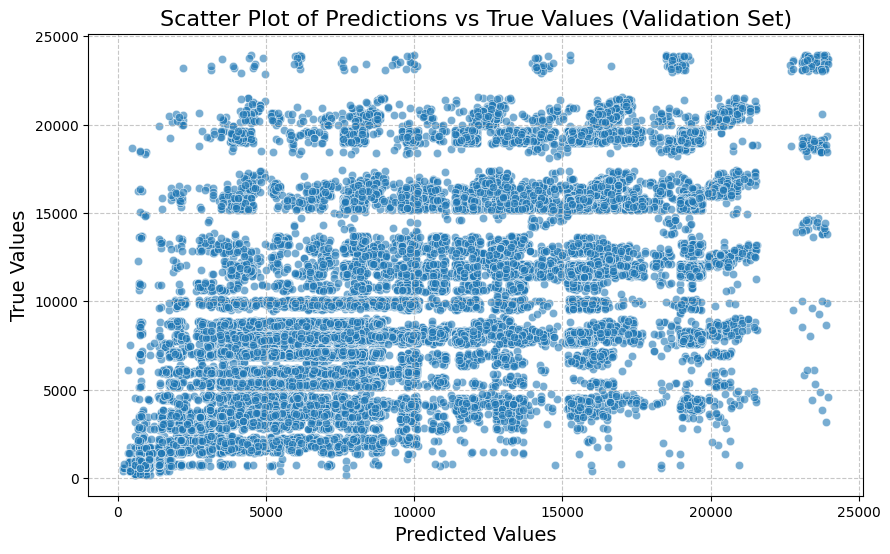

{'Train RMSE': 1364.3064632888138,
 'Val RMSE': 4178.484251733882,
 'Val R2 Score': 0.29253554117735703}

In [ ]:
model_pred(dt, X_pca, y, cv=5)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Assuming you have a Pandas DataFrame `X` and a Pandas Series `y`

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=45, shuffle=True)

# Create a DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring function (you can customize this based on your preference)
scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, scoring=scoring, cv=5, refit='mse', return_train_score=False)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best MSE Score:", best_score)

# Predict on the validation set using the best model
y_val_pred = grid_search.predict(X_val)

# Evaluate the model on the validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print the evaluation metrics on the validation set
print("Validation RMSE:", val_rmse)
print("Validation R2 Score:", val_r2)



Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best MSE Score: 14969126.759349694
Validation RMSE: 3809.3626874263387
Validation R2 Score: 0.4120075702489048


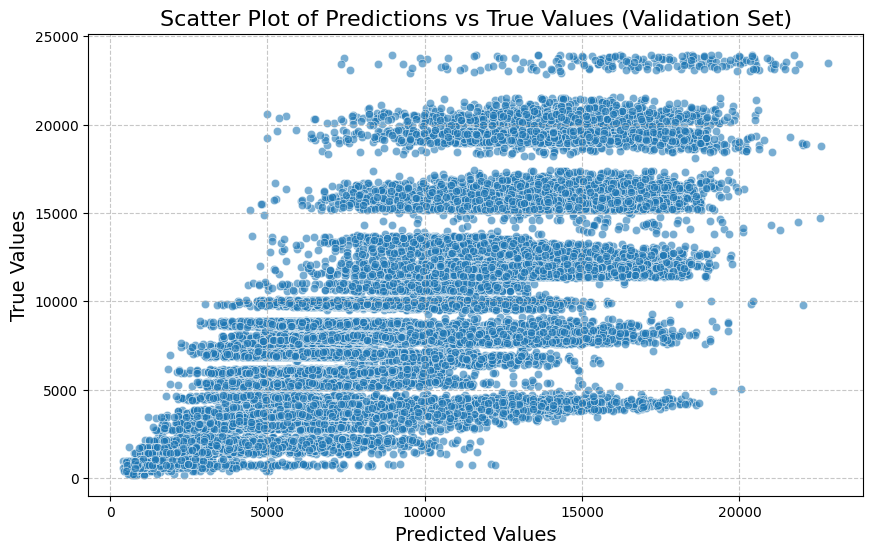

{'Train RMSE': 1695.8334832319756,
 'Val RMSE': 3270.4508500287257,
 'Val R2 Score': 0.5666065524412656}

In [ ]:
model_pred(clf, X_pca, y, cv=5)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,10,0,3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1000001,10,0,1,6.0,14.0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1000001,10,0,12,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1000001,10,0,12,14.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1000002,16,0,8,0.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,13,1,20,0.0,0.0,1,0,0,0,0,1,0,1,0,1,0,0,0
550064,1006035,1,0,20,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0,1,0
550065,1006036,15,1,20,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,1
550066,1006038,1,0,20,0.0,0.0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((385047, 19), (165021, 19), (385047,), (165021,))

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [ ]:
model = Sequential()

In [ ]:
input_neurons = X_train.shape[1]
number_hidden_layers = 2
output_layer_neuron = 1
hidden_layer_1_neurons = 10
hidden_layer_2_neurons = 5

In [ ]:
model.add(InputLayer(input_shape=(input_neurons,)))

In [ ]:
model.add(Dense(units=hidden_layer_1_neurons,activation='relu'))
model.add(Dense(units=hidden_layer_2_neurons,activation='relu'))
model.add(Dense(units=output_layer_neuron,activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                200       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 10)                60        
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 486 (1.90 KB)
Trainable params: 486 (1.90 

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model_history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50)

Epoch 1/50
12033/12033 [==============================] - 61s 5ms/step - loss: 26242130.0000 - val_loss: 25311580.0000
Epoch 2/50
12033/12033 [==============================] - 30s 3ms/step - loss: 25317966.0000 - val_loss: 25536470.0000
Epoch 3/50
12033/12033 [==============================] - 29s 2ms/step - loss: 25263302.0000 - val_loss: 25396128.0000
Epoch 4/50
12033/12033 [==============================] - 29s 2ms/step - loss: 25235086.0000 - val_loss: 25230196.0000
Epoch 5/50
12033/12033 [==============================] - 29s 2ms/step - loss: 25206288.0000 - val_loss: 25328072.0000
Epoch 6/50
12033/12033 [==============================] - 30s 3ms/step - loss: 25145514.0000 - val_loss: 25093814.0000
Epoch 7/50
12033/12033 [==============================] - 34s 3ms/step - loss: 24716490.0000 - val_loss: 24589676.0000
Epoch 8/50
12033/12033 [==============================] - 33s 3ms/step - loss: 24612594.0000 - val_loss: 24579542.0000
Epoch 9/50
12033/12033 [========================

In [ ]:
predictions = model.predict(X_val)

5157/5157 [==============================] - 8s 1ms/step


In [ ]:
np.sqrt(mean_squared_error(predictions,y_val))

4660.634478800395